<a href="https://colab.research.google.com/github/isakhammer/deep_learning_project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
from copy import deepcopy as copy 
import matplotlib.pyplot as plt
import os
import pickle


 **Prerequisite**
 To make this work should this note be launched in the gi repositorub.com/isakhammer/deep_learning_project or have "project_2_trajectories" https://github.com/isakhammer/deep_learning_project or have "project_2_trajectories" folder in the same repo
 

**Importing Training data**


In [32]:
import numpy as np
import os
        

def import_batches():
    n_batches = 50
    
    data_prefix = "datalist_batch_"
    data_path = os.path.join( os.path.join(os.getcwd()), "project_2_trajectories")
    
    batches = {}
    
    for i in range(n_batches):
        # assemble track import path
        batch_path = os.path.join(data_path, data_prefix + str(i) + ".csv")
        batch_data = np.loadtxt(batch_path, delimiter=',', skiprows=1)
        
        # np.newaxis is adding a dimension such that (I,) -> (I, 1)
        batch = {}
        #batch["t"] = batch_data[:, 0, np.newaxis]
        batch["Y_q"] = batch_data[:, 1:4].T
        batch["Y_p"] = batch_data[:, 4:7].T
        batch["c_p"] = batch_data[:, 7, np.newaxis] 
        batch["c_q"] = batch_data[:, 8, np.newaxis] # potential energy
        
        batches[i] = batch

    return batches

def import_one_batch():
   
    data_prefix = "datalist_batch_"
    data_path = os.path.join(os.path.dirname(__file__), "project_2_trajectories")
    
    batches = {}
    
    i = 0
    # assemble track import path
    batch_path = os.path.join(data_path, data_prefix + str(i) + ".csv")
    batch_data = np.loadtxt(batch_path, delimiter=',', skiprows=1)
        
    # np.newaxis is adding a dimension such that (I,) -> (I, 1)
    batch = {}
    #batch["t"] = batch_data[:, 0, np.newaxis]
    batch["Y_q"] = batch_data[:, 1:4].T
    batch["Y_p"] = batch_data[:, 4:7].T
    batch["c_p"] = batch_data[:, 7, np.newaxis] 
    batch["c_q"] = batch_data[:, 8, np.newaxis] # potential energy
        
    batches[0] = batch

    return batch



**1. Implement functions for generating synthetic input data**

The proposed functions we choose as synthetic input this functions.

$$
f_1(y) = \frac{1}{2}y_1^2 + \frac{1}{2}y_2^2
$$

$$
f_2(y) = \frac{1}{2}{y}^2 
$$

$$
f_3(y) = 1 - cos(y)
$$

$$
f_4(y) = -\frac{1}{\|{y}\|}
$$


In [33]:
def f_1(y):
    return 0.5*y[0]**2 + 0.5*y[1]**2 

def f_2(y):
    return 0.5* np.square(y)

def f_3(y):
    return 1 - np.cos(y)

def f_4(y):
    return -1/np.sqrt(y[0]**2 +  y[1]**2 )


def generate_synthetic_batches(I,func = "2sqr", low=None, high=None):
    
    batch = {} 
    
    if func == "2sqr":
        
        d_0 = 2
        if (high==None) and (low==None):
            high=2
            low=-2
        batch["Y"] = np.random.uniform(high, low, size=(d_0,I) )    
        batch["c"] = f_1(batch["Y"])
        batch["c"] = batch["c"][:, np.newaxis]
        
        ct = f_1(batch["Y"] ) 
        return batch
    
    elif func == "1sqr":
        d_0 = 1
        
        if (high==None) and (low==None):
            high=2
            low=-2
        
        batch["Y"] = np.random.uniform(high, low, size=(d_0,I) )
        batch["c"] = f_2(batch["Y"] )
        batch["c"] = batch["c"].T
        
        return batch
    
    elif func == "1cos":
        d_0 = 1
        
        if (high==None) and (low==None):
            high=np.pi/3
            low=-np.pi/3
        
        batch["Y"] = np.random.uniform(high, low, size=(d_0,I) )
        batch["c"] = f_3(batch["Y"] )
        batch["c"] = batch["c"].T
        return batch
    
    elif func == "2norm-1":
        if (high==None) and (low==None):
            high=2
            low=-2
            
        d_0 = 2
        batch["Y"] = np.random.uniform(high, low, size=(d_0,I))
        
        for y in batch["Y"].T:
            if (np.all(y == 0)):
                y = np.array([0.1,0.1])
        
        batch["c"] = f_4(batch["Y"]) 
        batch["c"] = batch["c"].T
        batch["c"] = batch["c"][:, np.newaxis]
            
        return batch
        
    
    else:
        raise Exception("Not axeped func")
        
        


**TODO**
Show phaseplot or something (ot maybe not) 


**2. Implement the neural network for training approximation of Hamiltonian function**





The proposed model is formulated as 
$$
\tilde{F}(Y; \theta) = \eta((Z^{(K)})^T w + \mu \mathbf{1} ) 
$$
where for $k = 0, 1, 2, ... , K-1 $
$$
Z^{(k+1)} = Z^{(k)} + h  \sigma(W_k Z^{(k)} + b_1 ), \\
Z^{(0)} = \hat{I} Y.
$$
Here is a

$$
\hat{I} = 
\begin{bmatrix}
I_{d_0 \times d_0} \\
\textbf{0} 
\end{bmatrix}
$$



where the gradient is define as 
...





In [34]:
def F_tilde(Y, th, d_0, d, K, h):
    
    Z = {}
    I_d = np.identity(d)[:,:d_0]
    Z[0] = I_d@Y

    for k in range(K):
        Z_hat = th["W"][k]@Z[k]+th["b"][k]
        Z[k+1] = Z[k] + h*sigma(Z_hat, False)
    
    Upsilon = eta(Z[K].T@th["w"]+th["mu"])
    
    return Z, Upsilon 


def initialize_weights(d_0, d, K):
    th = {}
    
    th["W"] = np.zeros((K, d, d))
    th["b"] = np.zeros((K, d, 1))
    
    for i in range(K):
        th["W"][i] = np.identity(d)
        th["b"][i] = np.zeros((d, 1))
            
    th["w"] = np.ones((d, 1 ))
    th["mu"] = np.zeros((1, 1))
    
    return th



def sigma(x, derivative=False):   
    if (derivative):
        return 1 / np.cosh(x)**2 
    return np.tanh(x)

def eta(x, derivative=False, identity=False):
    if identity==True:
        if (derivative):
            return np.ones(x.shape)
        return x
    else:
        if (derivative):
            return 0.25*(np.cosh(0.5*x) )**(-2)
        return 0.5*np.tanh(0.5*x) + 0.5




The objective function is on the form 

$$
J(\theta) = \frac{1}{2} \lVert  \tilde{F} (Y; \theta) - c \rVert ^{2}
$$
where $\theta  = \{ W_0, ..., W_{K-1}, b_0, ..., b_{K-1} , w, \mu\}$.

However, to be able to optimize the parameters $\theta$ can the gradient of $\nabla J(\theta)$ be formulated for the last layer like this

$$
\begin{align}
\frac{\partial J}{\partial \mu} &= \eta '((Z^{(K)})^T w + \mu \mathbf{1} )^T (\Upsilon -c) \\
\frac{\partial J}{\partial w} &= Z^{(K)} \left [ (\Upsilon - c) \odot \eta'((Z^{(K)})^T w + \mu  \right ]
\end{align}
$$
and similarly for the hidden layers,
$$
\begin{align}
P^{(K)} &= w \cdot \left [ (\Upsilon - c) \odot \eta'\left (  (Z^{(K)})^T w + \mu \mathbf{1}\ \right) \right ]^T  \\ 
P^{(k-1)} &= P^{(k)} + h W_{k-1}^{T} \cdot \left [ \sigma'\left (  W_{k-1} Z^{(k-1)} + \beta_{k-1} \ \right) \odot P^{(k)} \right ]  \\
\frac{\partial J}{\partial W_k} &= h \left [ P^{(k+1)} \odot \sigma ' (W_k Z^{(k)}  + b_k) \right ] (Z^{(k)})^T \\
\frac{\partial J}{\partial b_k} &= h \left [ P^{(k+1)} \odot \sigma ' (W_k Z^{(k)} + b_k) \right ] \mathbf{1}.
\end{align}
$$







In [35]:
def J_func(Upsilon, c):
    return 0.5*np.linalg.norm(c - Upsilon)**2


def dJ_func(c, Y, th, d_0, d, K, h):
    Z, Upsilon = F_tilde(Y, th, d_0, d, K, h)
    I = Upsilon.shape[0]
        
    etahat = eta(Z[K].T@th["w"] + th["mu"]*np.ones(( I, 1)), derivative=True )
        
    P = np.zeros(( K+1, d, I))
    
    P[K] = np.outer(th["w"], ( (Upsilon - c)* etahat).T)
        
    dJ_mu = etahat.T @(Upsilon - c)
        
    dJ_w = Z[K] @ ((Upsilon - c) * etahat)
        
    for k in range(K, 0, -1):
        P[k-1] = P[k] + h*th["W"][k-1].T @ (sigma(th["W"][k-1]@Z[k-1]+np.outer(th["b"][k-1],np.ones(I)), True) * P[k])
            
    dJ_W = np.zeros((K, d, d))
    dJ_b = np.zeros((K, d, 1))
        
    for k in range(K):
        dsigma = sigma(th["W"][k]@Z[k]+np.outer(th["b"][k],np.ones(I)),True)
            
        dJ_W[k] = h*(P[k+1]*dsigma) @ Z[k].T
        dJ_b[k] = (h*(P[k+1]*dsigma) @ np.ones(I))[:,np.newaxis]
    dJ = {}
    dJ["w"], dJ["mu"], dJ["W"], dJ["b"] = dJ_w, dJ_mu, dJ_W, dJ_b
    return dJ

To make sure our training data is inside the range of the hypothesis function $\eta$ we use a  linear scaling funtion to scale the data. The scaling function is given by:
$$
\hat{x} = \frac{(b - x) \alpha + (x - a)\beta }{b - a}
$$

and the inverse function

$$
x = \frac{(\hat{x}+ \alpha ) b - (\hat{x} - \beta)a}{ \beta -  \alpha}
$$

where $b = \max _{i,j} x$ and $a = \min _{i,j} x$ such that all values in $ [a,b ] \mapsto [\alpha, \beta]$. Since the range of our $\eta$ is $[0,1]$  we choose $\beta = 1$ and $\alpha = 0$. Later in the project will we also have use for inverted scaling without shift, this is in the context of finding the derivative. 
$$
x = \frac{\hat{x} (b-a) }{\beta - \alpha }
$$



In [36]:

def scale(x, alpha=0, beta=1, returnParameters = False):
    
    a = np.min(x)
    b = np.max(x)
    
    if returnParameters:        
        return alpha, beta, a, b

    else:
        def  invscale(x):
            return ((x + alpha)*b - (x - beta)*a) / (beta-alpha)
        
        return ( (b - x)*alpha + (x - a)*beta)/(b - a), invscale
     
def invscaleparameter(x, alpha, beta, a, b):
    return ((x+alpha)*b - (x-beta)*a) / (beta-alpha)

def invscaleparameter_no_shift(x, alpha, beta, a, b):
    return x*(b-a)/(beta-alpha)

**Optimization Algorithms**

We will evaluate two optimization algorithms in the project. 

**Gradient Descent Algorithm**
$$
\theta_{i+1} = \theta_{i+1} - \tau \nabla J(\theta^{(r)})
$$
**Adams Algorithm**

```
beta_1, beta_2 = 0.9, 0.999
alpha = 0.01
epsilon = 10^(-8)

v_0, m_0 = 0, 0

while not converged:
    g = dJ(th)
    m = beta_1 m + ( 1- beta_1)g_j
    v = beta_2 v + (1 - beta_2)(g*g)
    m_hat = m/(1 - beta_1^j)
    v_hat = v/(1 - beta_2^j)
    theta = theta - alpha m_hat/ ( v_hat^(0.5) + epsilon )
    
```





In [37]:

def gradientDesent(K, th, dJ, tau):
    
    th["mu"] = th["mu"] - tau*dJ["mu"]
    th["w"] = th["w"] - tau*dJ["w"]
    
    th["W"] = th["W"] -  tau*dJ["W"]
    th["b"] = th["b"] -  tau*dJ["b"]
    return th


def adam_algebra(th, dJ, v, m, key, j, alpha =10**(-5)):
        beta_1, beta_2 =  0.9, 0.999
        epsilon =  10**(-8)
    
        g = dJ[key] 
        m[key] = beta_1*m[key] + (1- beta_1)*g
        v[key] = beta_2*v[key] + (1 - beta_2)*(g*g)
        mhat = m[key]/(1 - beta_1**(j+1))
        vhat = v[key]/(1 - beta_2**(j+1))
        th[key] -= alpha*mhat/(np.square(vhat) + epsilon)
        return th, v, m
    


**Training Procedure**

In [38]:



def train(c, d, d_0, K, h, Y, th, tau=0.0005, max_it=60, print_it=True, method="gd", alpha =7.5*10**(-5)):
    # compute Zk
    err = np.inf
    tol = 0.01
    
    
    itr = 0
    Z, Upsilon = F_tilde(Y, th, d_0, d, K, h)
    JJ = np.zeros(max_it+1)
    err = J_func(Upsilon,c)
    
    JJ[0] = err
    
    # Adam parameters 
    m = {}
    m["mu"] = np.zeros(th["mu"].shape)
    m["w"] = np.zeros(th["w"].shape)
    m["W"] = np.zeros(th["W"].shape)
    m["b"] = np.zeros(th["b"].shape)
    v = copy(m)
    
    
    
    
    while (itr < max_it ):
        
        Z, Upsilon = F_tilde(Y, th, d_0, d, K, h)
        
        
        
        if (method=="gd"):
            dJ = dJ_func(c, Y, th, d_0, d, K, h)
            th = gradientDesent(K, th, dJ, tau)
        
        elif (method=="adam"):
            j = itr
            
            dJ = dJ_func(c, Y, th, d_0, d, K, h)
            
            th, v, m = adam_algebra(th, dJ, v, m, "mu", j, alpha)
            th, v, m = adam_algebra(th, dJ, v, m, "w", j, alpha)
            th, v, m = adam_algebra(th, dJ, v, m, "W", j, alpha)
            th, v, m = adam_algebra(th, dJ, v, m, "b", j, alpha)
            
        else:
            print("No optimization method")
        
        err = J_func(Upsilon, c)  
        
        JJ[itr+1] = err
        
        itr += 1
        
        if(itr%600 == 0) and (print_it == True):
            print(itr,err)
        
    return JJ , th
        
def stocgradient(c, d, d_0, K, h, Y, th, tau, max_it , bsize, sifts = 100, save = False, savefile = ""):
    
    JJ = np.zeros(sifts)
    I = Y.shape[1]
    totitr = int(I/bsize)
    for siftnum in range(sifts):
        print(siftnum)
        
        indexes = np.array(range(I))
        
        np.random.shuffle(indexes)
        
        itr = 0
        
        Z, Upsilon = F_tilde(Y, th, d_0, d, K, h)
        err = J_func(Upsilon, c)
        JJ[siftnum] = err
        
        if save and siftnum%100 == 0:
            th_file = open(savefile, "wb")
            pickle.dump(th, th_file)
            th_file.close()
        
        while len(indexes) > 0:
            """
            if (itr % 50 == 0):
                print(siftnum,itr,totitr)
            itr +=1
            """
            if len(indexes) >= bsize:
                #bsliceI = np.random.choice( indexes, bsize, False)
                bsliceI = indexes[:bsize]
                Yslice = Y[:,bsliceI]
                cslice = c[bsliceI]
                
                dJJ, th = train(cslice, d, d_0, K, h, Yslice, th, tau, max_it)
                
                #JJ = np.append(JJ,dJJ)
                
                indexes = indexes[bsize:]
                
                
            else:
                Yslice = Y[:,indexes]
                cslice = c[indexes]
                
                
                dJJ, th = train(cslice, d, d_0, K, h, Yslice, th, tau, max_it)
                
                #JJ = np.append(JJ,dJJ)
                
                indexes = []
            
    return JJ, th





**Stochastic Gradient**

Since the objective function is independent of time can it be training with unordered trainingdata. Using this fact can we sweep through the dataset faster by random shuffling and slizing the entire dataset.  We will in the implementation assume that the dataset is already merged for $c$ and $Y$, and will allocate the job to the data pre-processing. 


In [39]:
def stocgradient(c, d, d_0, K, h, Y, th, tau, max_it , bsize, sifts = 100):
    
    JJ = np.array([])
    I = Y.shape[1]
    totitr = int(I/bsize)
    for siftnum in range(sifts):
        
        indexes = np.array(range(I))
        np.random.shuffle(indexes)
        
        itr = 0
        Z, Upsilon = F_tilde(Y, th, d_0, d, K, h)
        err = J_func(Upsilon, c)
        JJ = np.append(JJ, err)
        
        while len(indexes) > 0:
            
            if len(indexes) >= bsize:
                bsliceI = indexes[:bsize]
                Yslice = Y[:,bsliceI]
                cslice = c[bsliceI]
                
                dJJ, th = train(cslice, d, d_0, K, h, Yslice, th, tau, max_it)
                indexes = indexes[bsize:]
             
            else:
                Yslice = Y[:,indexes]
                cslice = c[indexes]
                
                dJJ, th = train(cslice, d, d_0, K, h, Yslice, th, tau, max_it) 
                indexes = []
            
    return JJ, th


(a) Test the model by using the suggested functions



In [58]:
def train_func(func):
    
    I = 8000
    K = 20
    h = 0.1
    sifts = 400
    Ihat = 320
    tau = 3/Ihat  
    
    data = generate_synthetic_batches(I, func)
    
    Y =data["Y"]
    c = data["c"]
    sc , invc = scale(c)
    sparameters = scale(c,returnParameters = True)
    
    inv_file = open( func+"_inv.pkl", "wb")
    pickle.dump(sparameters, inv_file)
    inv_file.close()
    
    d_0 = Y.shape[0]
    d = d_0*2
    
    th = initialize_weights(d_0, d, K)
    
    JJ, th = stocgradient(sc, d, d_0, K, h, Y, th, tau, 1 , Ihat, sifts)
    
    plt.plot(JJ)
    plt.yscale("log")
    plt.title("Cost Function for " + func)
    plt.show()
    
    th_file = open(func + "_th.pkl", "wb")
    pickle.dump(th, th_file)
    th_file.close()
    
    
    
def test_func(func):
    
    numData = 2000
    
    K = 20
    h = 0.1
    
    
    if func == "1sqr":
        Y  = np.linspace(-2,2,numData)
        Y = Y[:,np.newaxis].T
        c = 1/2*Y**2
        c = c.T
        
    elif func == "1cos":
        Y = np.linspace(-np.pi/3,np.pi/3,numData)
        Y = Y[:,np.newaxis].T
        c = 1-np.cos(Y)
        c = c.T
        
    elif func == "2sqr":
        x1 = np.linspace(-2,2,numData)
        Y = np.array([x1,-x1])
        c = 1/2*(Y[0]**2 + Y[1]**2)
        c = c.T
        
    elif func == "2norm-1":
        x2hat1 = np.linspace(-2,-1/4,int(numData/2))
        x2hat2 = np.linspace(1/4,2,int(numData/2))
        x2 = np.append(x2hat1,x2hat2)
        Y = np.array([x2,-x2])
        c = -1/np.sqrt(Y[0]**2 + Y[1]**2)
        c = c.T
        
    else:
        raise Exception("No func")
        
    
    d_0 = Y.shape[0]
    d = d_0*2
    
    
    inv_file = open( func+"_inv.pkl", "rb")
    inv = pickle.load(inv_file)
    inv_file.close()
    
    th_file = open(func + "_th.pkl", "rb")
    th = pickle.load(th_file)
    th_file.close()
    z, yhat = F_tilde(Y, th, d_0, d, K, h)
    
    y = invscaleparameter(yhat, inv[0], inv[1], inv[2], inv[3])
    
    plt.plot(y, label ="Estimated function")
    plt.plot(c, label ="Analytical function")
    plt.title("Comparison for " + func)
    plt.legend()
    plt.show()
  

Train model for 1sqr Function


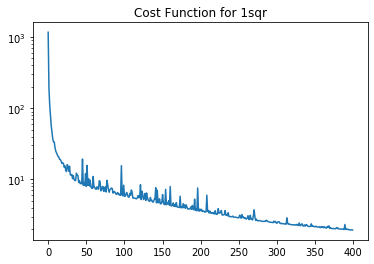

Train model for cos Function


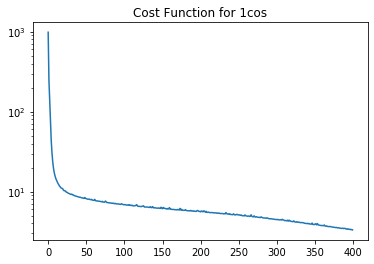

In [43]:
print("Train model for 1sqr Function")
train_func(func="1sqr")
print("Train model for cos Function")
train_func(func="1cos")

Train model for 2sqr Function


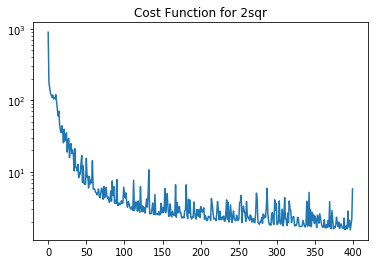

In [46]:
print("Train model for 2sqr Function")
train_func(func="2sqr")

Train model for 2norm-1 Function


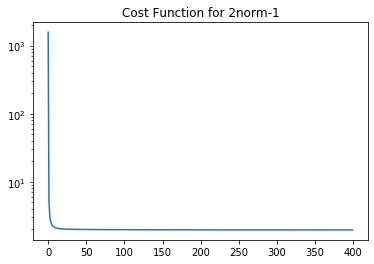

In [56]:
print("Train model for 2norm-1 Function")
train_func(func="2norm-1")

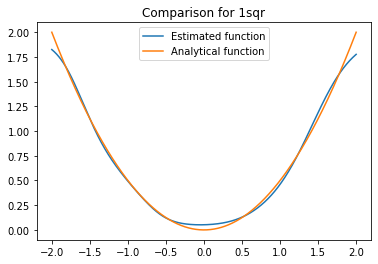

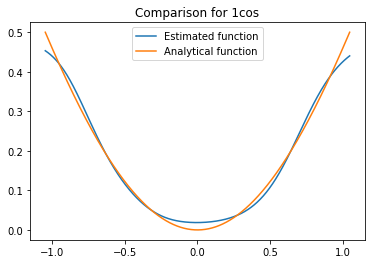

In [44]:
test_func(func="1sqr")
test_func(func="1cos")

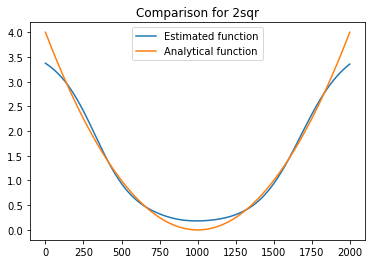

In [55]:
test_func(func="2sqr")

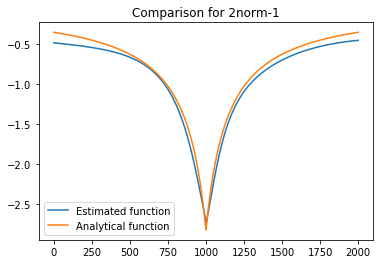

In [60]:
test_func(func="2norm-1")

(b) Investigate systematically what are optimal choices for K, τ , d, h and any
other choices you need to make. Balance performance in the generalisation
phase with time consumption of training

**Tau Sensitivity**


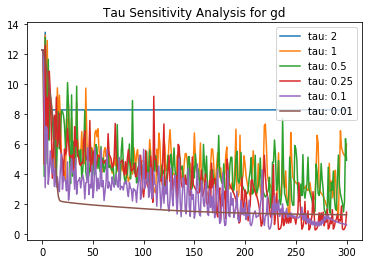

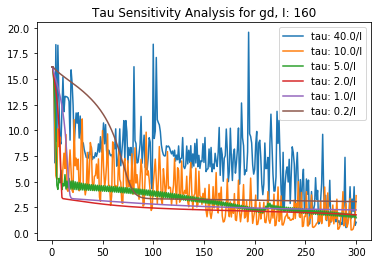

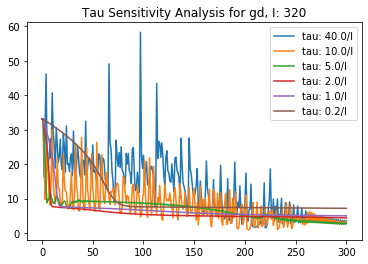

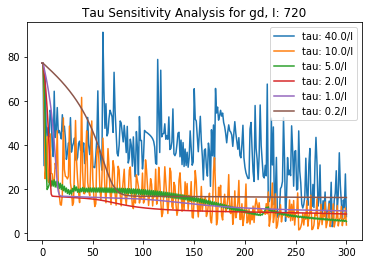

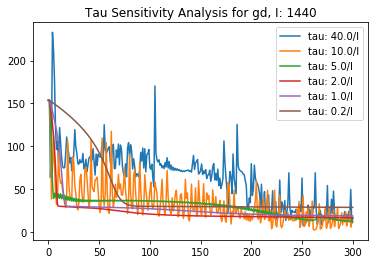

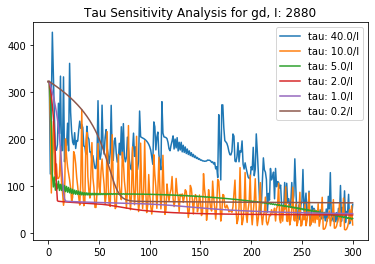

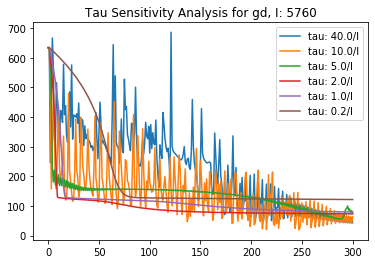

In [14]:


# Chosen default values
K = 20
h = 0.1
d_0 = 2
d = 4
I = 600
max_it = 300
tauxI = 2


def tau_sensitivity(method="gd"):
           
    I = 100     
    b = generate_synthetic_batches(I)
    
    c, inv = scale(b["c"])
    Y = b["Y"]
    #Y = scale(b["Y"])
    d_0 = Y.shape[0]
    
    var = [ 2, 1, 0.5, 0.25, 0.1, 0.01]
    it = np.arange(0,max_it+1)
    
    for i in range(len(var)):    
        tau = var[i]
        th = initialize_weights(d_0, d, K)
        JJ,th = train(c, d, d_0, K, h, Y, th, tau=tau, max_it=max_it, method=method)
        plt.plot(it, JJ, label="tau: "+ str(tau))
    
    plt.title("Tau Sensitivity Analysis for " + method)
    plt.legend()
    plt.show()
    
def tauI_sensitivity(I, method="gd"):            
    
    b = generate_synthetic_batches(I)
    
    c, inv = scale(b["c"])
    Y = b["Y"]
    #Y = scale(b["Y"])
    d_0 = Y.shape[0]
    
    var = np.array([ 40, 10, 5, 2, 1, 0.2])/I
    it = np.arange(0,max_it+1)
    
    for i in range(len(var)):    
        tau = var[i]
        th = initialize_weights(d_0, d, K)
        JJ,th = train(c, d, d_0, K, h, Y, th, tau=tau, max_it=max_it, method=method)
        plt.plot(it, JJ, label="tau: "+ str(tau*I) + "/I")
    
    "+str(I)"+str(I)
    plt.title("Tau Sensitivity Analysis for " + "{:.2f}".format(13.949999999999999) + ", I: "+str(I))
    plt.legend()
    plt.show()

print("Analzing Tau Sensitivity")

tau_sensitivity(method="gd")
I = [160, 320, 720, 1440, 2880, 5760]
for i in I:
    tauI_sensitivity(i)
    


We discover that the rate and stability of the convergence of the gradient desent method for a given $\tau$ is dependent on the number of data points $I$. We also discover that by using a $\tau$ that is inversely proportional with $I$, the convergence is similar for different choices of $I$. By looking at the analisys we find that $\tau = 2/I$ has the best rate and stability.

**Alpha Sensitivity**

In [22]:

def alpha_sensitivity(method="adam"):
                
    I = 100
    b = generate_synthetic_batches(I)
    
    c, inv = scale(b["c"])
    Y = b["Y"]
    #Y = scale(b["Y"])
    d_0 = Y.shape[0]
    
    var = [0.75*10**-4, 0.5*10**-4, 0.35*10**-4, 0.75*10**-5, 0.5*10**-5, 0.25*10**-6]
    it = np.arange(0,max_it+1)
    
    for i in range(len(var)):    
        alpha = var[i]
        th = initialize_weights(d_0, d, K)
        JJ,th = train(c, d, d_0, K, h, Y, th, tau=tau, max_it=max_it, method=method, alpha=alpha)
        plt.plot(it, JJ, label="alpha: "+ str(alpha))
    
    plt.title("Alpha Sensitivity Analysis for " + method)
    plt.legend()
    plt.show()
    
def alphaI_sensitivity(I, method="adam"):            
    
    b = generate_synthetic_batches(I)
    
    c, inv = scale(b["c"])
    Y = b["Y"]
    d_0 = Y.shape[0]
    
    var = np.array( [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6 ])#/I
    it = np.arange(0,max_it+1)
    
    for i in range(len(var)):    
        alpha = var[i]
        th = initialize_weights(d_0, d, K)
        JJ,th = train(c, d, d_0, K, h, Y, th, tau=tau, max_it=max_it, method=method, alpha=alpha)
        plt.plot(it, JJ, label="alpha: "+ str(alpha) )
    
    plt.title("ADAM Sensitivity - " + "I: "+str(I))
    plt.xlabel("Iteration")
    plt.ylabel("Cost function")
    plt.legend()
    plt.show()



import Warnings
warnings.filterwarnings('ignore')
    
I = [160, 320, 720, 1440, 2880, 5760]
for i in I:
    alphaI_sensitivity(i)

        

ModuleNotFoundError: No module named 'Warnings'

**h Sensitivity**

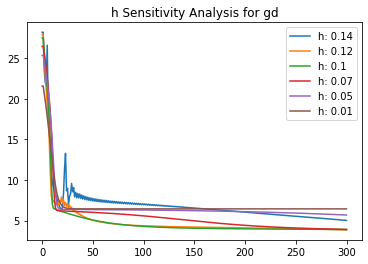

In [15]:

def h_sensitivity(method="gd"):
    I = 300
    b = generate_synthetic_batches(I)
    
    c, inv = scale(b["c"])
    Y = b["Y"]
    #Y = scale(b["Y"])
    d_0 = Y.shape[0]
    
    var = var = [ 0.14, 0.12, 0.1, 0.07, 0.05, 0.01]
    it = np.arange(0,max_it+1)
    
    for i in range(len(var)):    
        h = var[i]
        th = initialize_weights(d_0, d, K)
        JJ,th = train(c, d, d_0, K, h, Y, th, tauxI/I, max_it=max_it, method=method)
        plt.plot(it, JJ, label="h: "+ str(var[i]))
    
    plt.title("h Sensitivity Analysis for " + method)
    plt.legend()
    plt.show()

h_sensitivity(method="gd")

$h = 0.1$ seems to be a good choice.

**I-sensitivity**

I: 15
I: 20
I: 40
I: 80
I: 160
I: 320
I: 640
I: 1280


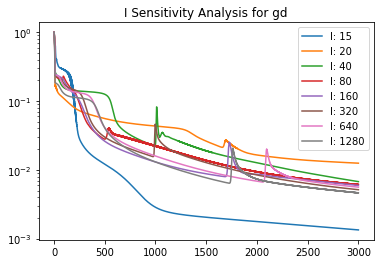

In [16]:

def I_sensitivity(method="gd"):
    max_it = 3000             
    var = var = [ 15, 20, 40, 80, 160, 320, 640, 1280]
    it = np.arange(0,max_it+1)
    
    for i in range(len(var)):    
        I = var[i]
        b = generate_synthetic_batches(I)
        c, inv = scale(b["c"])
        Y = b["Y"]
        #Y = scale(b["Y"])
        d_0 = Y.shape[0]
    
        print("I:", I)
        th = initialize_weights(d_0, d, K)
        JJ,th = train(c, d, d_0, K, h, Y, th, tauxI/I, max_it=max_it, print_it=False, method=method)
        JJ = JJ/JJ[0]
        plt.plot(it, JJ, label="I: "+ str(var[i]))
    
    #plt.yscale("log")
    plt.title("I Sensitivity Analysis for " + method)
    plt.yscale("log")
    plt.legend()
    plt.show()
I_sensitivity(method="gd")

**d-sensitivity**

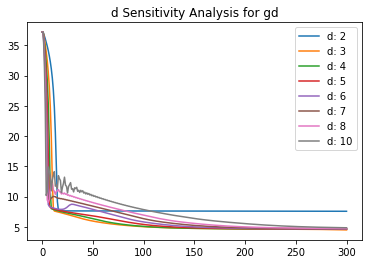

In [17]:


def d_sensitivity(method="gd"):
    I = 300         
    b = generate_synthetic_batches(I)
    
    c, inv = scale(b["c"])
    Y = b["Y"]
    #Y = scale(b["Y"])
    d_0 = Y.shape[0]
    
    var = var = [ 2, 3, 4, 5, 6, 7, 8, 10 ]
    it = np.arange(0,max_it+1)
    
    for i in range(len(var)):    
        d = var[i]
        th = initialize_weights(d_0, d, K)
        JJ,th = train(c, d, d_0, K, h, Y, th, tauxI/I, max_it=max_it, method=method)
        plt.plot(it, JJ, label="d: "+ str(var[i]))
    
    plt.title("d Sensitivity Analysis for " + method)
    plt.legend()
    plt.show()
d_sensitivity(method="gd")

$d = 4$ seems to be a good choice.

**K-Sensitivity**

600 20.72986842953711
1200 12.919093786713153
600 16.616688495266914
1200 11.657866841980383
600 11.201737916174023
1200 1.411678160699969
600 4.492957233008557
1200 1.0215153607295056
600 2.947386840289149
1200 1.0654430578356369
600 2.8287895047564917
1200 1.1631755397302008
600 8.018335653928476
1200 2.1380358131328325


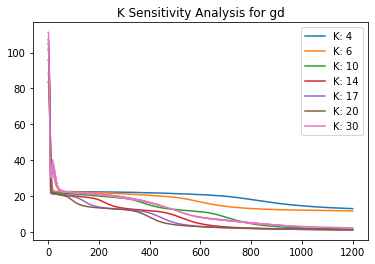

In [22]:

def K_sensitivity(method="gd"):
    I = 1000         
    b = generate_synthetic_batches(I)
    
    c, inv = scale(b["c"])
    Y = b["Y"]
    #Y = scale(b["Y"])
    d_0 = Y.shape[0]
    
    var = var = [ 4, 6, 10, 14, 17, 20, 30]
    it = np.arange(0,max_it*4+1)
    
    for i in range(len(var)):    
        K = var[i]
        th = initialize_weights(d_0, d, K)
        JJ,th = train(c, d, d_0, K, h, Y, th, tauxI/I, max_it=max_it*4, method=method)
        plt.plot(it, JJ, label="K: "+ str(var[i]))
    
    plt.title("K Sensitivity Analysis for " + method)
    plt.legend()
    plt.show()
K_sensitivity(method="gd")

¤¤

(c) Train the model for the case of data given (with unknown Hamiltonian func-
tion).

In [1]:

def train_uknown():
    K = 20
    h = 0.1
    I = 80
    max_it = 1
    sifts = 110
    tau = 0.1
    
    batches = import_batches()
    batch1 = batches[0]
    antB = 40
    testbatch = batches[antB-1]
    
    Y = batch1["Y_q"]
    d_0 = Y.shape[0]
    d = d_0*2
    
    th = initialize_weights(d_0, d, K)
    JJ = np.array([])

    bigbatch = {}
    bigbatch["Y"] = np.array([[],[],[]])
    bigbatch["c"] = np.array([])
    
    for i in range(antB):
        batch = batches[i]
        bigbatch["Y"] = np.append(bigbatch["Y"],batch["Y_q"],1)
        bigbatch["c"] = np.append(bigbatch["c"],batch["c_q"])
        
    Y = bigbatch["Y"]
    c,inv = scale(bigbatch["c"][:,np.newaxis])
    
    JJ, th = stocgradient(c, d, d_0, K, h, Y, th, tau, 1 , 40, sifts)
 
    plt.plot(JJ)
    plt.yscale("log")
    plt.show()
    
    tY = testbatch["Y_q"]
    tc,invscale = scale(testbatch["c_q"])
    
    z, yhat = F_tilde(tY, th, d_0, d, K, h)
    
    y = invscale(yhat)
    ic = invscale(tc)
    
    plt.plot(y)
    plt.plot(ic)
    plt.show()
    
    th_file = open("weights.pkl", "wb")
    pickle.dump(th, th_file)
    th_file.close()



In [27]:
def test_unknown(pq):
    
    K = 20
    h = 0.1
    
    
    inv_file = open( pq + "_unknown_inv.pkl", "rb")
    inv = pickle.load(inv_file)
    inv_file.close()
    
    w_file = open(pq + "_unknown_w.pkl", "rb")
    th = pickle.load(w_file)
    w_file.close()
    
    batches = import_batches()
    batch1 = batches[0]
    antB = 50
    
    Y = batch1["Y_q"]
    d_0 = Y.shape[0]
    d = d_0*2
    
    for i in range(antB):
        plt.title("Batch: " + str(i) + ",   y = F(" + pq +")")
        testbatch = batches[i]
    
        tY = testbatch["Y_"+pq]
        
        z, yhat = F_tilde(tY, th, d_0, d, K, h)
        
        
        y = invscaleparameter(yhat, inv[0], inv[1], inv[2], inv[3])
        c = testbatch["c_"+pq]
        
        
        print("Mean error:", np.average(np.abs(y-c)))
        
        plt.plot(y,label ="y")
        plt.plot(c,label ="c")
        plt.ylim(-0.2,0.8)
        plt.legend()
        plt.show()

Mean error: 0.0035752891941011455


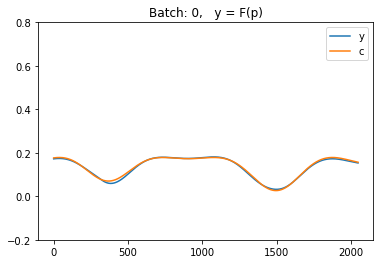

Mean error: 0.003605999106927585


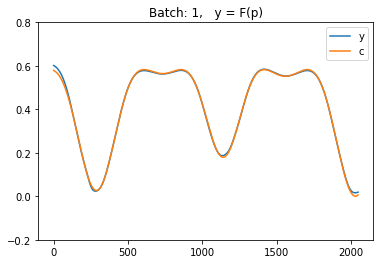

Mean error: 0.004448337415149697


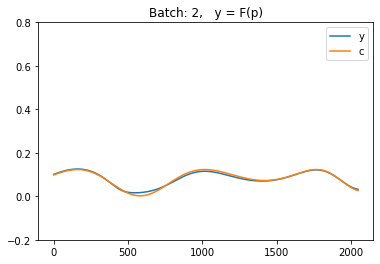

Mean error: 0.0037902366994888824


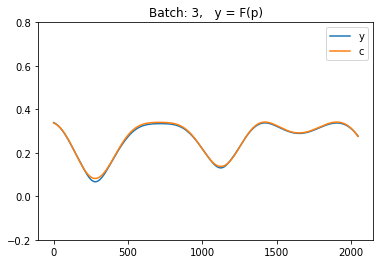

Mean error: 0.003320389343684037


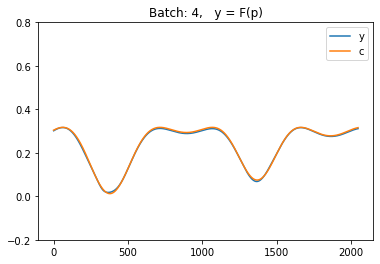

Mean error: 0.005729476600208465


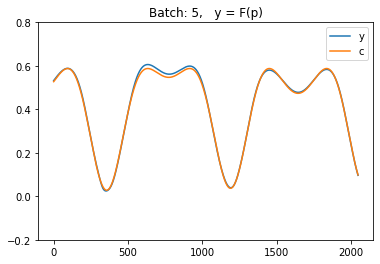

Mean error: 0.003913340111573908


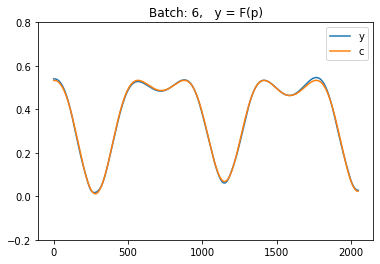

Mean error: 0.003462912197375361


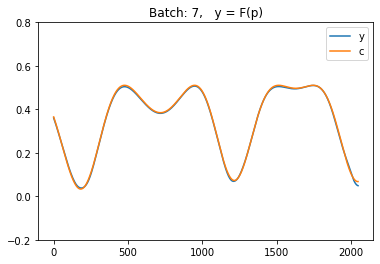

Mean error: 0.0028375803173604293


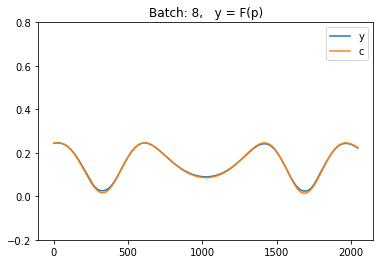

Mean error: 0.0020295084416015827


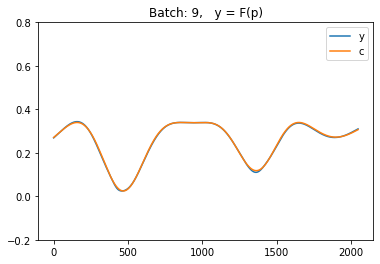

Mean error: 0.0038109338974205587


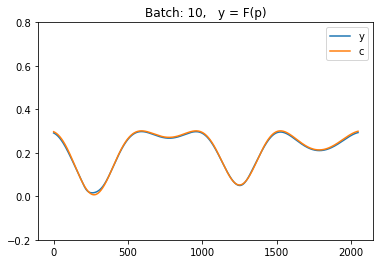

Mean error: 0.003510726210257522


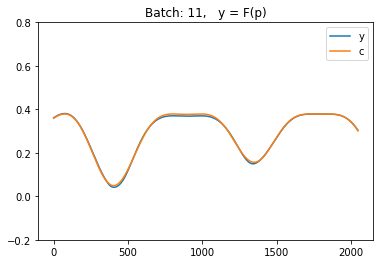

Mean error: 0.003096191621653494


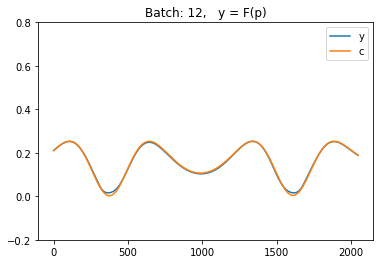

Mean error: 0.004083774141384029


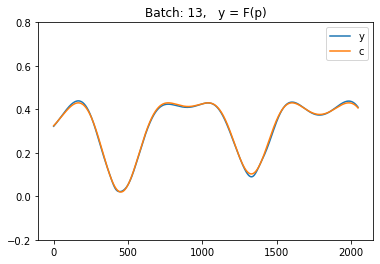

Mean error: 0.0030706764279287


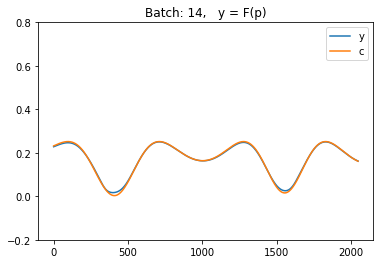

Mean error: 0.0025506314322093376


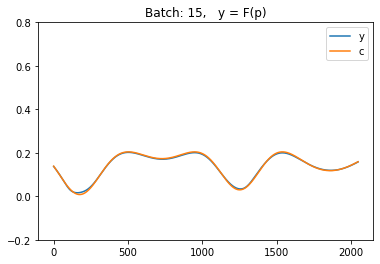

Mean error: 0.00459058374932975


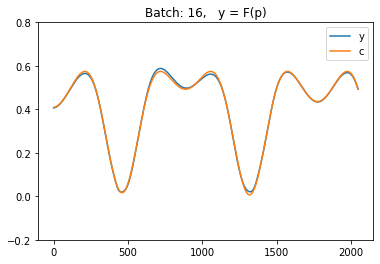

Mean error: 0.001858842473129118


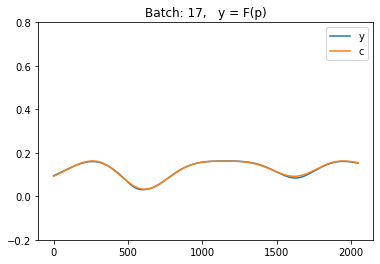

Mean error: 0.004530981706814624


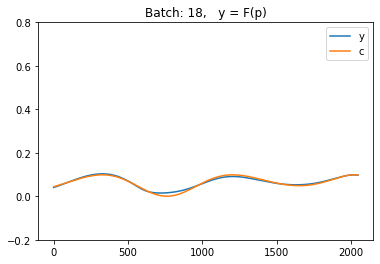

Mean error: 0.0029177250105439853


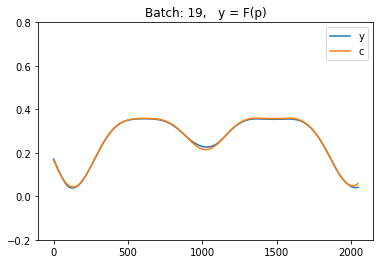

Mean error: 0.0032422968746697676


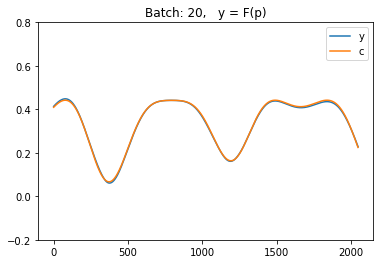

Mean error: 0.002802595785471262


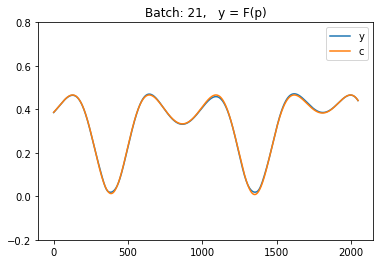

Mean error: 0.004145119976919862


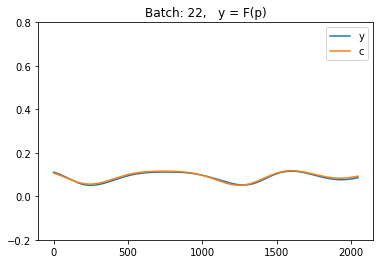

Mean error: 0.004205701294853891


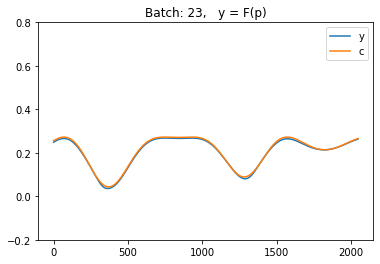

Mean error: 0.003994056612725968


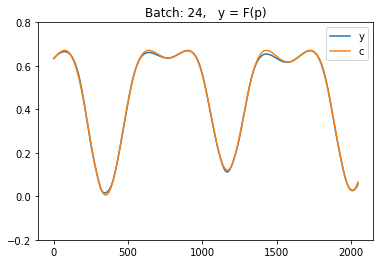

Mean error: 0.0035391759903748857


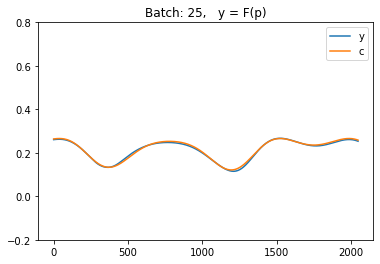

Mean error: 0.0032945073546308996


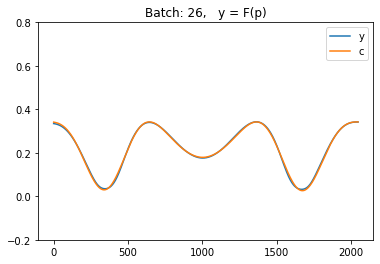

Mean error: 0.019146241689190168


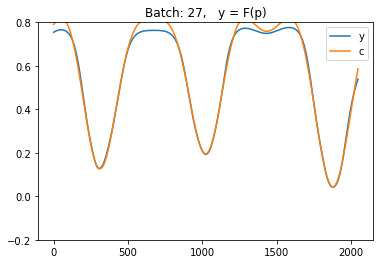

Mean error: 0.00251728089468011


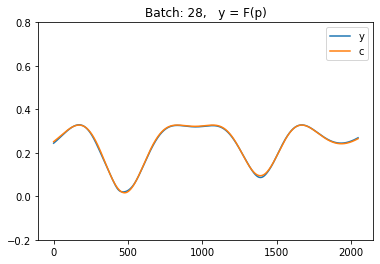

Mean error: 0.002791640937041148


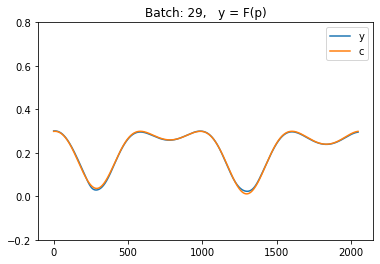

Mean error: 0.007512791277208606


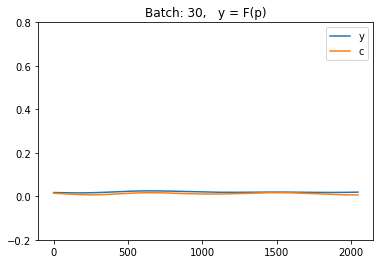

Mean error: 0.006216123668584101


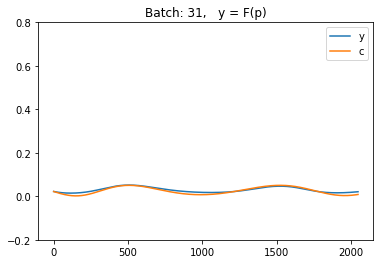

Mean error: 0.004048691034617078


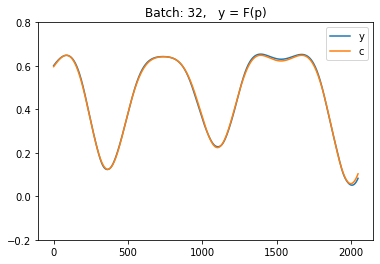

Mean error: 0.0020647975035004125


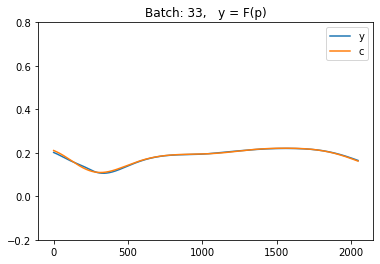

Mean error: 0.003953526144565591


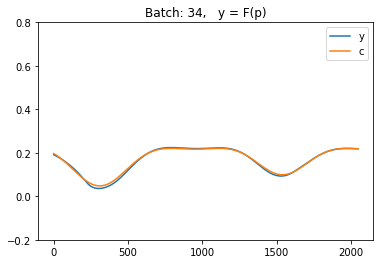

Mean error: 0.004867606254315614


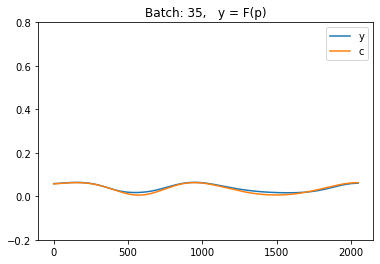

Mean error: 0.0038033585479174286


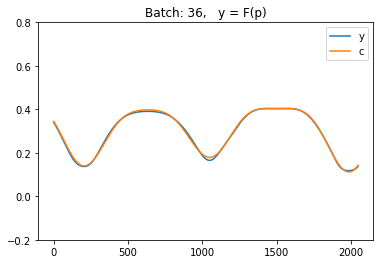

Mean error: 0.004649524276814705


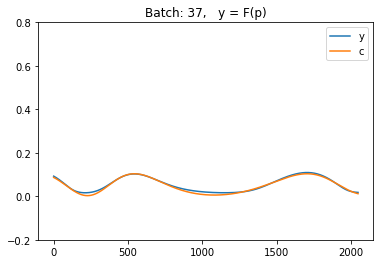

Mean error: 0.0034675409390933767


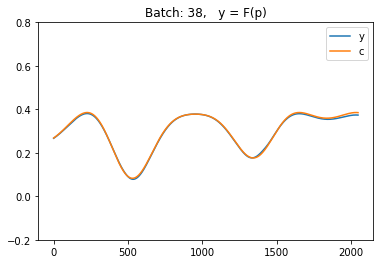

Mean error: 0.005003303683208799


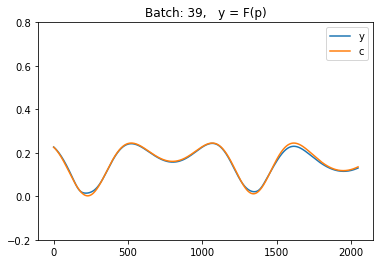

Mean error: 0.010179478428871944


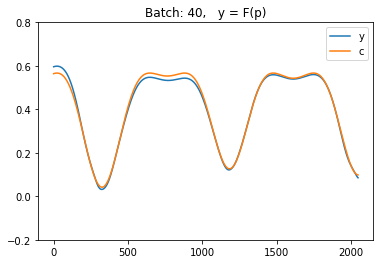

Mean error: 0.02120605631326777


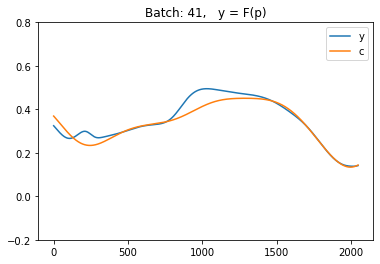

Mean error: 0.007409422839185588


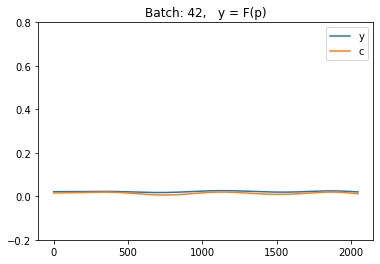

Mean error: 0.005646974293970706


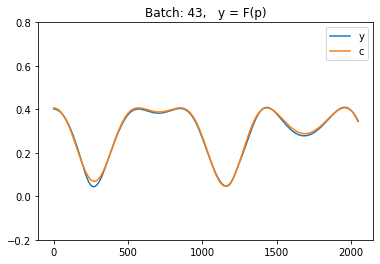

Mean error: 0.0024917391517664954


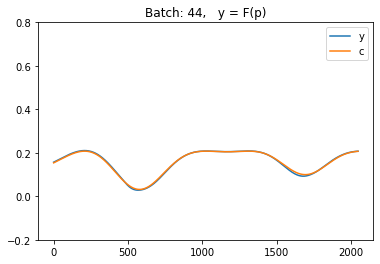

Mean error: 0.003488720078072171


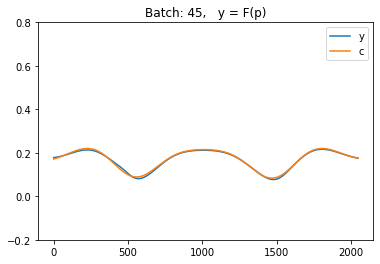

Mean error: 0.0137073346055613


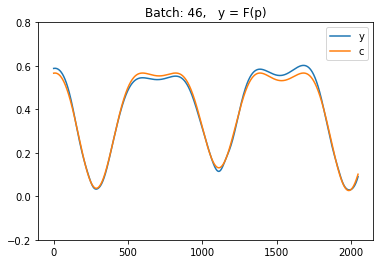

Mean error: 0.004585079342727371


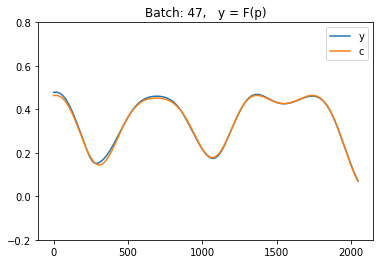

Mean error: 0.0030013068724340664


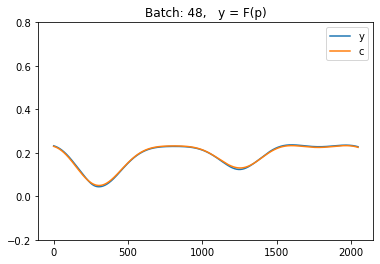

Mean error: 0.003681122724407079


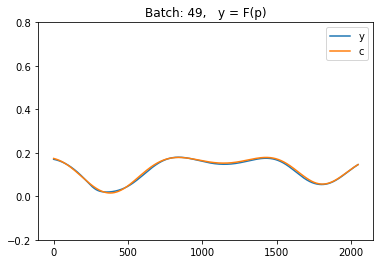

Mean error: 0.010534481038605248


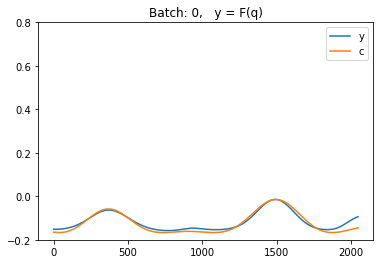

Mean error: 0.009004505360867445


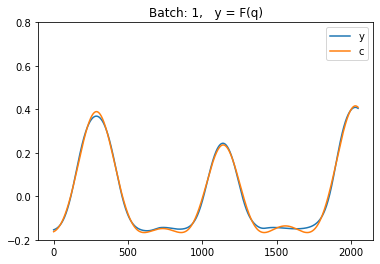

Mean error: 0.008197046259924838


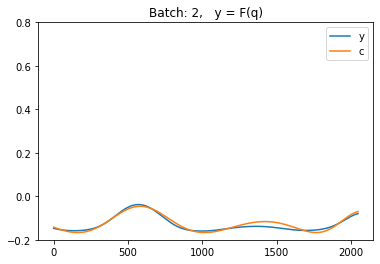

Mean error: 0.007792907727067876


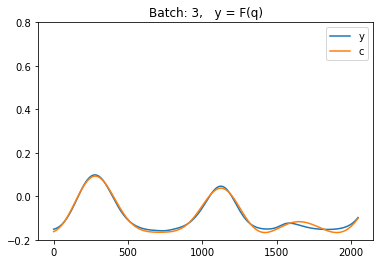

Mean error: 0.0061114548022766415


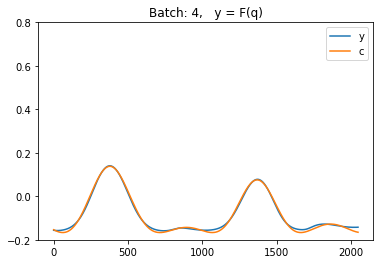

Mean error: 0.009888489613031869


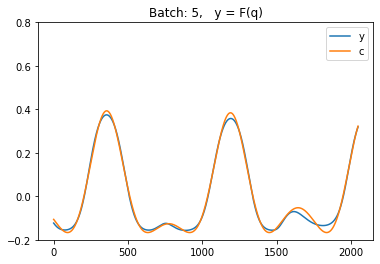

Mean error: 0.008372728672546105


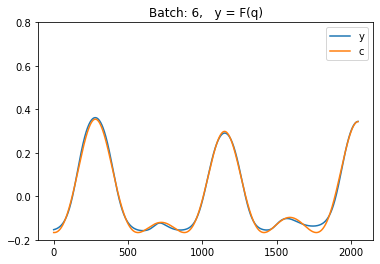

Mean error: 0.009770432585414837


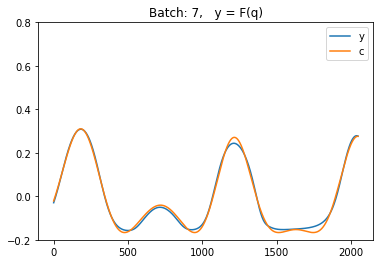

Mean error: 0.010575263513552674


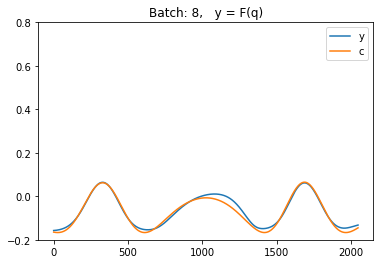

Mean error: 0.010747124324013271


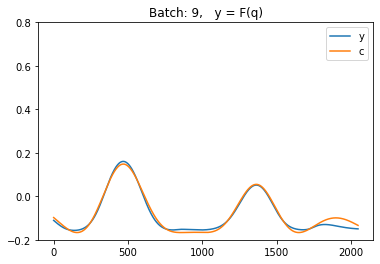

Mean error: 0.00807477164637834


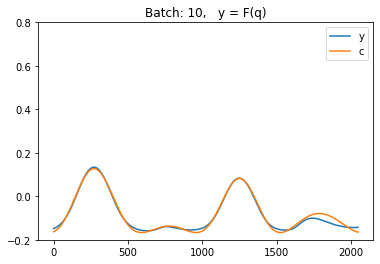

Mean error: 0.010084245578104768


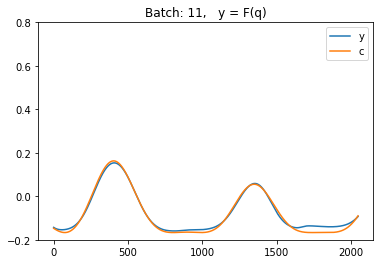

Mean error: 0.009379170549875826


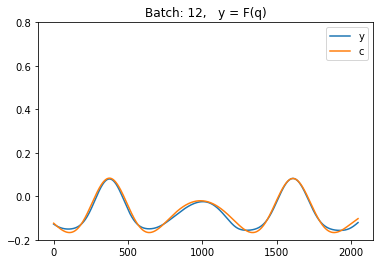

Mean error: 0.010230884369116539


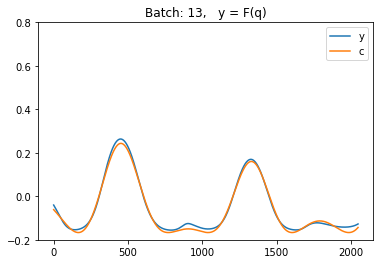

Mean error: 0.00803076537447708


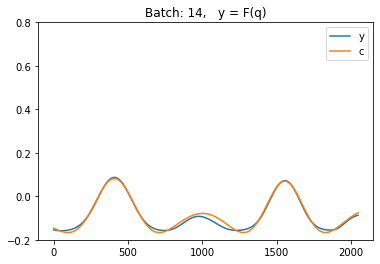

Mean error: 0.005895575899418873


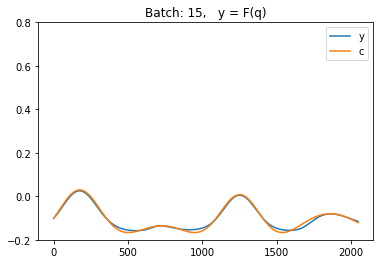

Mean error: 0.012150494615678343


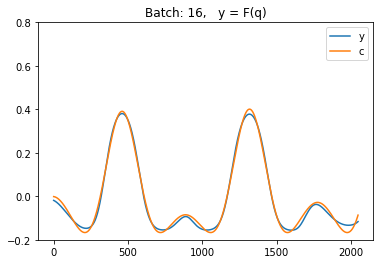

Mean error: 0.007928507576052436


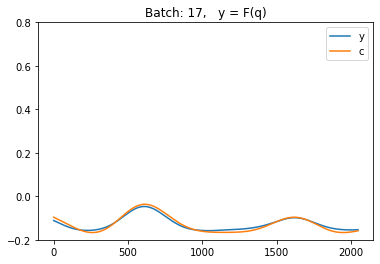

Mean error: 0.008095577071669514


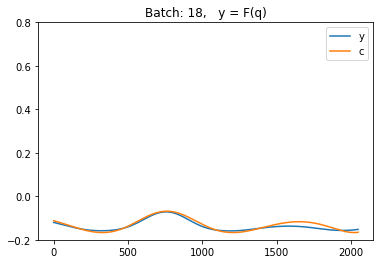

Mean error: 0.008540734708018404


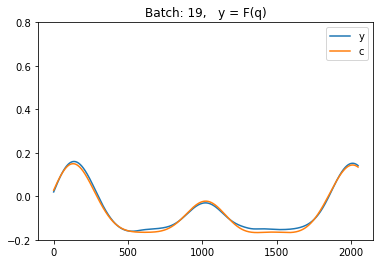

Mean error: 0.00756055491428172


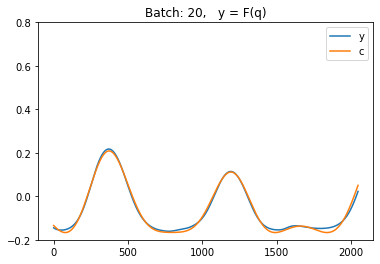

Mean error: 0.012012442258689658


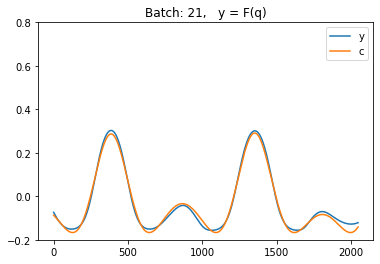

Mean error: 0.005523490066449982


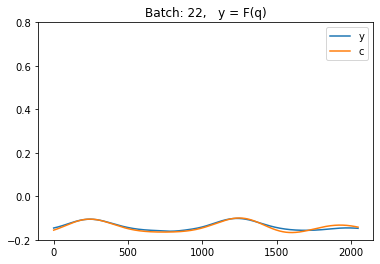

Mean error: 0.008576644579133628


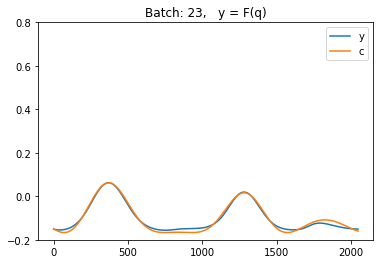

Mean error: 0.011203780120193275


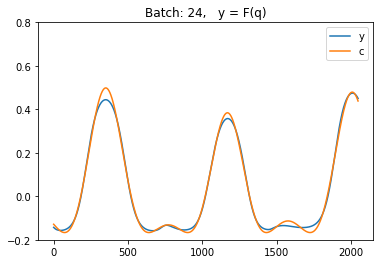

Mean error: 0.008091881680529635


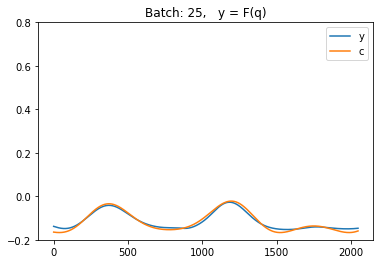

Mean error: 0.010004322266414754


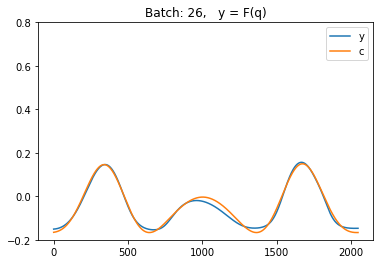

Mean error: 0.015332538603660573


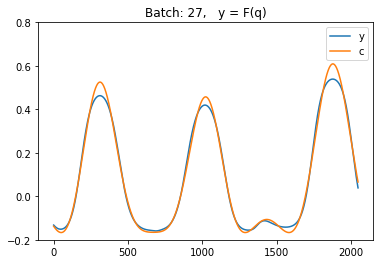

Mean error: 0.010124106861300263


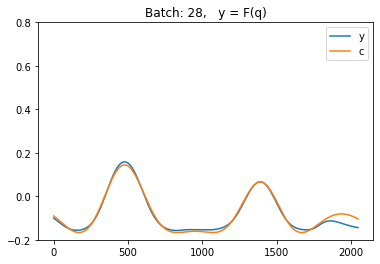

Mean error: 0.009854885182021517


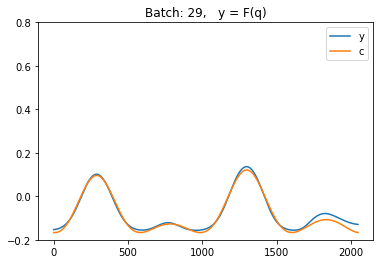

Mean error: 0.008440512149570468


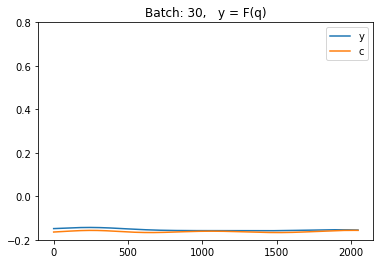

Mean error: 0.006151796830326826


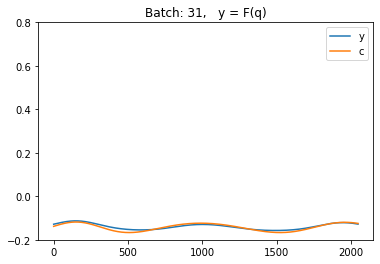

Mean error: 0.00801813751027613


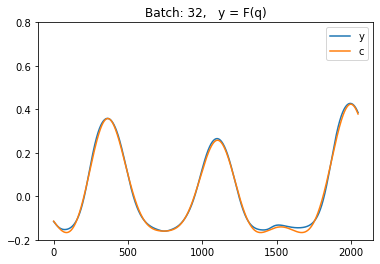

Mean error: 0.010219845329018684


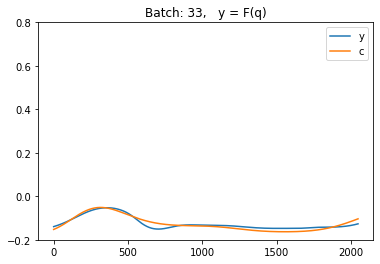

Mean error: 0.01213365976368995


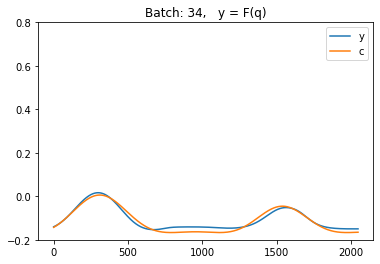

Mean error: 0.009491259652367693


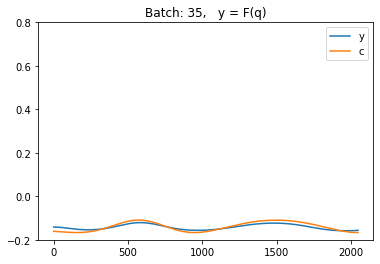

Mean error: 0.010815923317863924


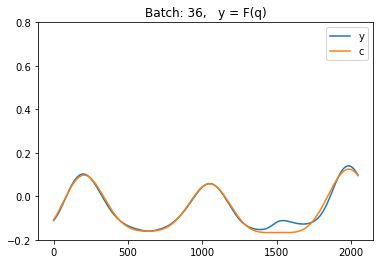

Mean error: 0.006642770324120867


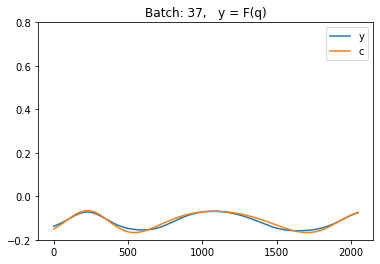

Mean error: 0.005785700670945425


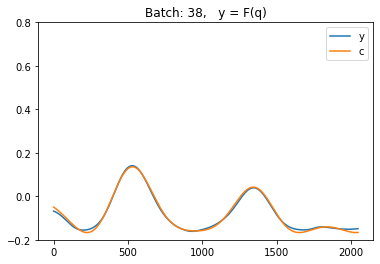

Mean error: 0.013073442600424395


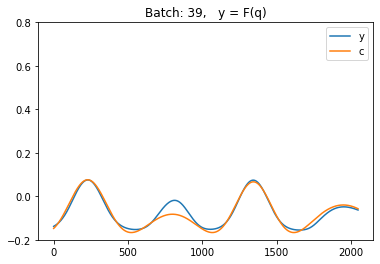

Mean error: 0.01302722997947732


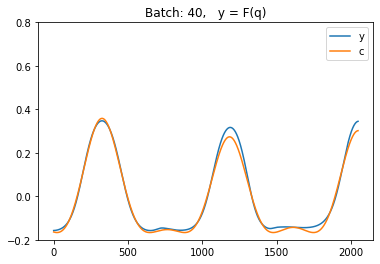

Mean error: 0.023989995676898843


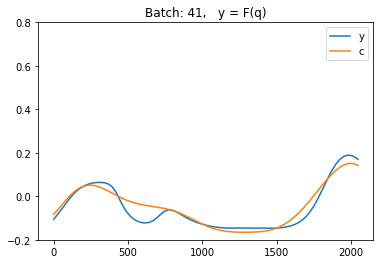

Mean error: 0.017802875195199436


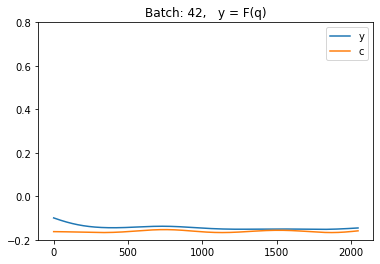

Mean error: 0.028305233936316995


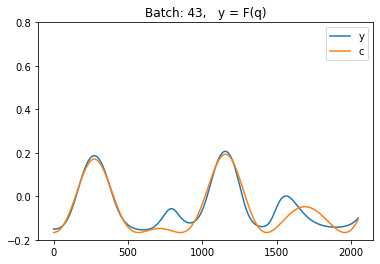

Mean error: 0.007688026495715197


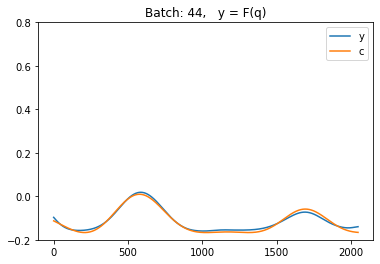

Mean error: 0.0050932947488626056


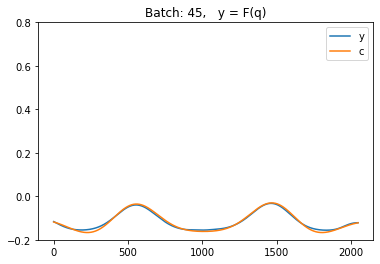

Mean error: 0.011918062202387777


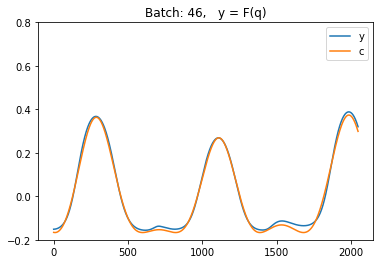

Mean error: 0.010168548013113739


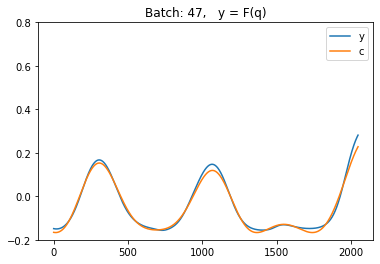

Mean error: 0.008122478949739114


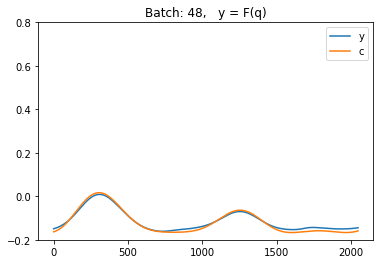

Mean error: 0.012076039630852513


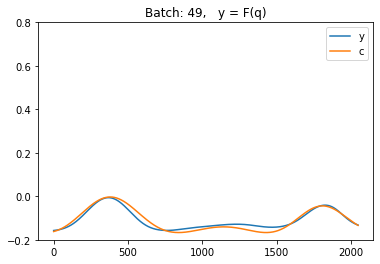

In [28]:
test_unknown("p")
test_unknown("q")

Here y is the numerical values and c is the analytical values. We see that the numerical vaues aproximates the analytical ones quite closely. The training data was batches 0 to 39, we the that the trained function generalizes nicely to the test data (batches 40 to 49) that was not included in the training data.

In [2]:
def test_nlp(pq):
    
    numData = 2000
    
    K = 20
    h = 0.1
    d_0 = 1
    d = 2
    
    if pq == "p":
        Y  = np.linspace(-2,2,numData)
        Y = Y[:,np.newaxis].T
        c = 1/2*Y**2
        c = c.T
        
    elif pq == "q":
        Y = np.linspace(-np.pi/3,np.pi/3,numData)
        Y = Y[:,np.newaxis].T
        c = 1-np.cos(Y)
        c = c.T
    else:
        raise Exception("p or q")
    
    
    inv_file = open( pq + "_nlp_inv.pkl", "rb")
    inv = pickle.load(inv_file)
    inv_file.close()
    
    w_file = open(pq + "_nlp_w.pkl", "rb")
    th = pickle.load(w_file)
    w_file.close()
    z, yhat = F_tilde(Y, th, d_0, d, K, h)
    
    y = invscaleparameter(yhat, inv[0], inv[1], inv[2], inv[3])
    
    plt.plot(Y.T,y, label ="y")
    plt.plot(Y.T,c, label ="c")
    plt.legend()
    plt.show()